# Comparison of MLP and Bayes NN on MNIST dataset

### Importing libraries

In [1]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam

import zhusuan as zs

import numpy as np
import matplotlib.pyplot as plt
import mnist

tf.set_random_seed(123)
np.random.seed(321)

/home/glegeza/Programming/semestr2/bayesian_deep_learning/venv/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:526: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/home/glegeza/Programming/semestr2/bayesian_deep_learning/venv/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:527: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/home/glegeza/Programming/semestr2/bayesian_deep_learning/venv/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:528: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 

### Load data

In [2]:

train_X = mnist.train_images()[:5000]
train_X = train_X.reshape(train_X.shape[0], -1) / 255.
train_y = mnist.train_labels()[:5000]

test_X = mnist.test_images()[:1000]
test_X = test_X.reshape(test_X.shape[0], -1) / 255.
test_y = mnist.test_labels()[:1000]

n_train, x_dim = train_X.shape
y_dim = 10

train_y = tf.keras.utils.to_categorical(train_y, y_dim)
test_y = tf.keras.utils.to_categorical(test_y, y_dim)

train_X.shape, train_y.shape, test_X.shape, test_y.shape

((5000, 784), (5000, 10), (1000, 784), (1000, 10))

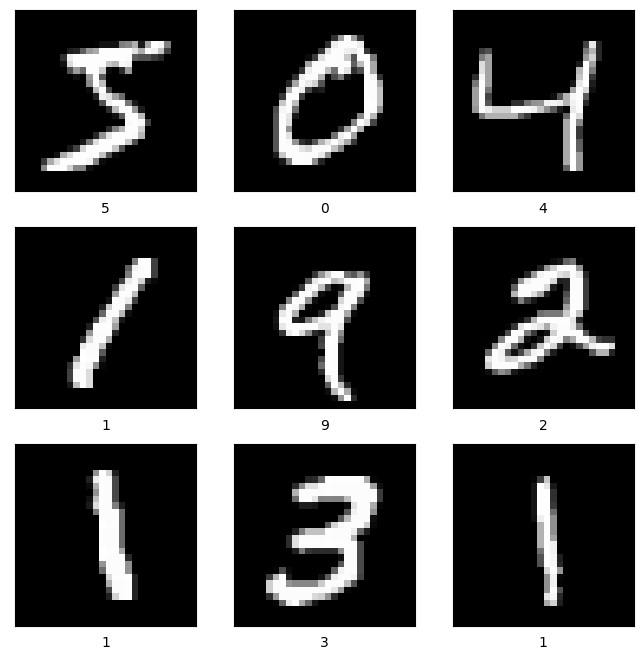

In [3]:
fig, ax = plt.subplots(3, 3, figsize=(8, 8))
for i, axi in enumerate(ax.flat):
    axi.imshow(train_X[i].reshape(28, 28), cmap='gray')
    axi.set(xticks=[], yticks=[], xlabel=np.argmax(train_y[i]))
plt.show()

### Defintion of parameters

In [4]:
n_hiddens = [50]
layer_sizes = [x_dim] + n_hiddens + [y_dim]

epochs = 5
lr = 0.01
batch_size = 100 

### MLP model

In [5]:
mlp = Sequential()
mlp.add(Dense(layer_sizes[1], activation="relu", input_shape=(x_dim,)))
for out_dim in layer_sizes[2:-1]:
    mlp.add(Dense(out_dim, activation="relu"))
mlp.add(Dense(y_dim, activation="softmax"))

optimizer = Adam(lr=lr)
mlp.compile(
    loss="categorical_crossentropy", optimizer=optimizer, metrics=["accuracy"]
)
mlp.build()
mlp.summary()

Instructions for updating:
Colocations handled automatically by placer.


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 50)                39250     
_________________________________________________________________
dense_1 (Dense)              (None, 10)                510       
Total params: 39,760
Trainable params: 39,760
Non-trainable params: 0
_________________________________________________________________


In [6]:
training_results = mlp.fit(
                            x=train_X,
                            y=train_y,
                            epochs=epochs,
                            batch_size=batch_size,
                            shuffle=True,
                            validation_data=(test_X, test_y),
                        )

Train on 5000 samples, validate on 1000 samples
Instructions for updating:
Use tf.cast instead.


2023-11-12 23:20:40.730131: I tensorflow/core/platform/cpu_feature_guard.cc:141] Your CPU supports instructions that this TensorFlow binary was not compiled to use: AVX2 FMA
2023-11-12 23:20:40.755053: I tensorflow/core/platform/profile_utils/cpu_utils.cc:94] CPU Frequency: 1800000000 Hz
2023-11-12 23:20:40.756374: I tensorflow/compiler/xla/service/service.cc:150] XLA service 0x558905b418f0 executing computations on platform Host. Devices:
2023-11-12 23:20:40.756441: I tensorflow/compiler/xla/service/service.cc:158]   StreamExecutor device (0): <undefined>, <undefined>


Epoch 1/5
5000/5000 [==============================] - 1s 107us/sample - loss: 0.6240 - acc: 0.8114 - val_loss: 0.3824 - val_acc: 0.8710
Epoch 2/5
5000/5000 [==============================] - 0s 87us/sample - loss: 0.2382 - acc: 0.9268 - val_loss: 0.3037 - val_acc: 0.9070
Epoch 3/5
5000/5000 [==============================] - 0s 87us/sample - loss: 0.1557 - acc: 0.9554 - val_loss: 0.2727 - val_acc: 0.9090
Epoch 4/5
5000/5000 [==============================] - 0s 81us/sample - loss: 0.1206 - acc: 0.9652 - val_loss: 0.2616 - val_acc: 0.9220
Epoch 5/5
5000/5000 [==============================] - 0s 79us/sample - loss: 0.0757 - acc: 0.9774 - val_loss: 0.2664 - val_acc: 0.9250


In [7]:
def plot_results(metrics, title=None, ylabel=None, ylim=None, metric_name=None, color=None):
    fig, ax = plt.subplots(figsize=(15, 4))
    if not (isinstance(metric_name, list) or isinstance(metric_name, tuple)):
        metrics = [metrics,]
        metric_name = [metric_name,]

    for idx, metric in enumerate(metrics):    
        ax.plot(metric, color=color[idx])

    plt.xlabel("Epoch")
    plt.ylabel(ylabel)
    plt.title(title)
    # plt.xlim([0, 20])
    # plt.ylim(ylim)
    # Tailor x-axis tick marks
    # ax.xaxis.set_major_locator(MultipleLocator(5))
    # ax.xaxis.set_major_formatter(FormatStrFormatter('%d'))
    # ax.xaxis.set_minor_locator(MultipleLocator(1))
    plt.grid(True)
    plt.legend(metric_name)   
    plt.show()
    plt.close()

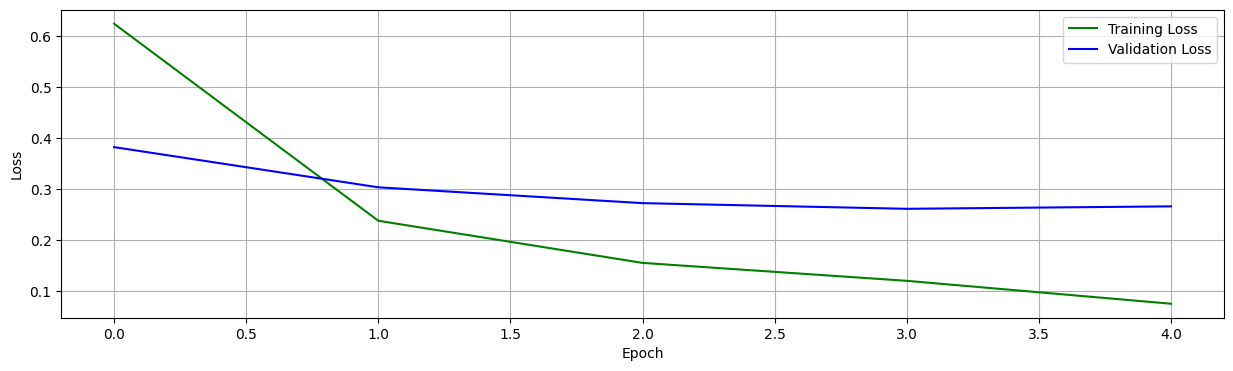

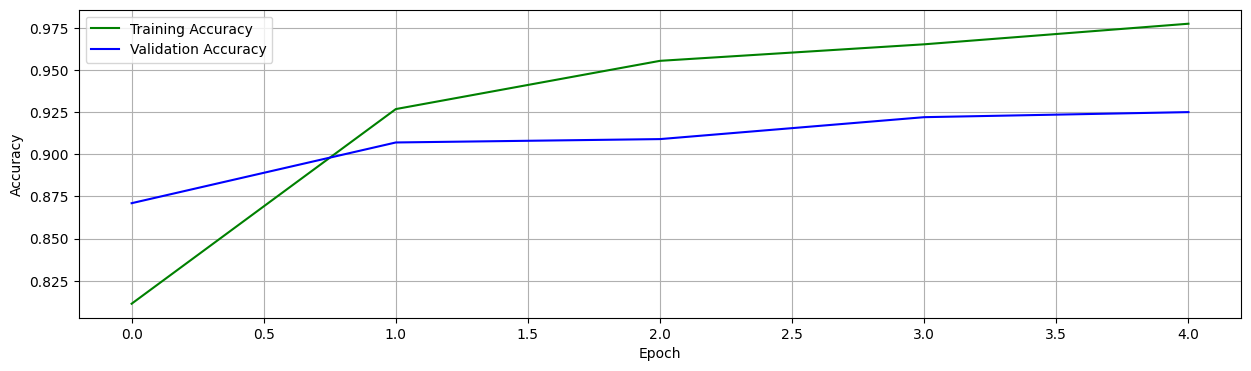

In [8]:
train_loss = training_results.history["loss"]
valid_loss = training_results.history["val_loss"]
train_acc  = training_results.history["acc"]
valid_acc  = training_results.history["val_acc"]

plot_results([ train_loss, valid_loss ],        
            ylabel="Loss", 
            metric_name=["Training Loss", "Validation Loss"],
            color=["g", "b"]);

plot_results([ train_acc, valid_acc ], 
            ylabel="Accuracy",
            metric_name=["Training Accuracy", "Validation Accuracy"],
            color=["g", "b"])

### Standarize data

In [9]:
def standardize(data_train, data_test):
    """
    Standardize a dataset to have zero mean and unit standard deviation.

    :param data_train: 2-D Numpy array. Training data.
    :param data_test: 2-D Numpy array. Test data.

    :return: (train_set, test_set, mean, std), The standardized dataset and
        their mean and standard deviation before processing.
    """
    std = np.std(data_train, 0, keepdims=True)
    std[std == 0] = 1
    mean = np.mean(data_train, 0, keepdims=True)
    data_train_standardized = (data_train - mean) / std
    data_test_standardized = (data_test - mean) / std
    mean, std = np.squeeze(mean, 0), np.squeeze(std, 0)
    return data_train_standardized, data_test_standardized, mean, std

In [10]:
train_X_standard, test_X_standard, _, _ = standardize(train_X, test_X)
train_y_standard, test_y_standard, _, _ = standardize(train_y, test_y)

### Bayes NN model

In [11]:
@zs.meta_bayesian_net(scope="bnn", reuse_variables=True)
def build_bnn(x, layer_sizes, n_particles):
    bn = zs.BayesianNet()
    h = tf.tile(x[None, ...], [n_particles, 1, 1])
    for i, (n_in, n_out) in enumerate(zip(layer_sizes[:-1], layer_sizes[1:])):
        w = bn.normal("w" + str(i), tf.zeros([n_out, n_in + 1]), std=1.,
                      group_ndims=2, n_samples=n_particles)
        h = tf.concat([h, tf.ones(tf.shape(h)[:-1])[..., None]], -1)
        h = tf.einsum("imk,ijk->ijm", w, h) / tf.sqrt(
            tf.cast(tf.shape(h)[2], tf.float32))
        if i < len(layer_sizes) - 2:
            h = tf.nn.relu(h)

    y_mean = bn.deterministic("y_mean", h)
    y_logstd = tf.get_variable("y_logstd", shape=[],
                               initializer=tf.constant_initializer(0.))
    bn.normal("y", y_mean, logstd=y_logstd)
    return bn

In [12]:
@zs.reuse_variables(scope="variational")
def build_mean_field_variational(layer_sizes, n_particles):
    bn = zs.BayesianNet()
    for i, (n_in, n_out) in enumerate(zip(layer_sizes[:-1], layer_sizes[1:])):
        w_mean = tf.get_variable(
            "w_mean_" + str(i), shape=[n_out, n_in + 1],
            initializer=tf.constant_initializer(0.))
        w_logstd = tf.get_variable(
            "w_logstd_" + str(i), shape=[n_out, n_in + 1],
            initializer=tf.constant_initializer(0.))
        bn.normal("w" + str(i), w_mean, logstd=w_logstd,
                  n_samples=n_particles, group_ndims=2)
    return bn

In [13]:
n_particles = tf.placeholder(tf.int32, shape=[], name="n_particles")
x = tf.placeholder(tf.float32, shape=[None, x_dim])
y = tf.placeholder(tf.float32, shape=[None, y_dim])
w_names = ["w" + str(i) for i in range(len(layer_sizes) - 1)]

In [14]:
model = build_bnn(x, layer_sizes, n_particles)
variational = build_mean_field_variational(layer_sizes, n_particles)

def log_joint(bn):
    log_pws = bn.cond_log_prob(w_names)
    log_py_xw = bn.cond_log_prob('y')
    return tf.add_n(log_pws) + tf.reduce_mean(log_py_xw, 1) * n_train

model.log_joint = log_joint

lower_bound = zs.variational.elbo(
    model, {'y': y}, variational=variational, axis=0)
cost = lower_bound.sgvb()

optimizer = tf.train.AdamOptimizer(learning_rate=lr)
infer_op = optimizer.minimize(cost)

In [15]:
y_mean = lower_bound.bn["y_mean"]
y_pred = tf.arg_max(tf.reduce_mean(y_mean, 0), 1, output_type=tf.int32)
y_true = tf.argmax(y, 1, output_type=tf.int32)
acc = tf.reduce_mean(tf.cast(tf.equal(y_pred, y_true), tf.float32))

Instructions for updating:
Use `tf.math.argmax` instead


In [16]:
lb_samples = 10
ll_samples = 1000
iters = (n_train-1) // batch_size + 1
test_freq = 1

In [17]:
# Run the inference
train_accs = []
test_accs = []

train_lbs = []
test_lbs = []

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    for epoch in range(1, epochs + 1):
        perm = np.random.permutation(train_X_standard.shape[0])
        train_X_standard = train_X_standard[perm, :]
        train_y_standard = train_y_standard[perm]
        lbs = []
        correct = 0
        for t in range(iters):
            x_batch = train_X_standard[t * batch_size:(t + 1) * batch_size]
            y_batch = train_y_standard[t * batch_size:(t + 1) * batch_size]
            _, lb = sess.run(
                [infer_op, lower_bound],
                feed_dict={n_particles: lb_samples,
                           x: x_batch, y: y_batch})
            if epoch % test_freq == 0:
                train_acc = sess.run(
                    acc,
                    feed_dict={n_particles: ll_samples,
                            x: x_batch, y: y_batch}
                )
            else:
                train_acc = 0
            lbs.append(lb)
            correct += train_acc * x_batch.shape[0]
        train_acc = correct / n_train
        train_accs.append(train_acc)
        train_lb = np.mean(lbs)
        train_lbs.append(train_lb)
        print('Epoch {}: Lower bound = {}; Train accuracy = {}'.format(epoch, train_lb, np.round(train_acc, 3)))

        lb = sess.run(
            lower_bound,
            feed_dict={n_particles: lb_samples,
                        x: test_X_standard, y: test_y_standard})
        test_lb = np.mean(lb)
        test_lbs.append(test_lb)

        if epoch % test_freq == 0:
            test_acc = sess.run(
                acc,
                feed_dict={n_particles: ll_samples,
                           x: test_X_standard, y: test_y_standard})
            test_accs.append(test_acc)
            print('>> TEST')
            print('>> Test accuracy = {}; Lower bound = {}'.format(test_acc, test_lb))

Epoch 1: Lower bound = -7917.853515625; Train accuracy = 0.104


2023-11-12 23:21:46.795042: W tensorflow/core/framework/allocator.cc:124] Allocation of 3136000000 exceeds 10% of system memory.
2023-11-12 23:21:48.103002: W tensorflow/core/framework/allocator.cc:124] Allocation of 3140000000 exceeds 10% of system memory.
2023-11-12 23:21:49.409473: W tensorflow/core/framework/allocator.cc:124] Allocation of 3140000000 exceeds 10% of system memory.


>> TEST
>> Test accuracy = 0.0989999994635582; Lower bound = -8732.685546875
Epoch 2: Lower bound = -7681.91455078125; Train accuracy = 0.154


2023-11-12 23:22:48.315255: W tensorflow/core/framework/allocator.cc:124] Allocation of 3136000000 exceeds 10% of system memory.
2023-11-12 23:22:49.467290: W tensorflow/core/framework/allocator.cc:124] Allocation of 3140000000 exceeds 10% of system memory.


>> TEST
>> Test accuracy = 0.12200000137090683; Lower bound = -8307.166015625
Epoch 3: Lower bound = -7579.64501953125; Train accuracy = 0.307
>> TEST
>> Test accuracy = 0.38199999928474426; Lower bound = -8035.38037109375
Epoch 4: Lower bound = -7460.0390625; Train accuracy = 0.423
>> TEST
>> Test accuracy = 0.4309999942779541; Lower bound = -7974.75146484375
Epoch 5: Lower bound = -7292.3330078125; Train accuracy = 0.497
>> TEST
>> Test accuracy = 0.5230000019073486; Lower bound = -7970.4873046875


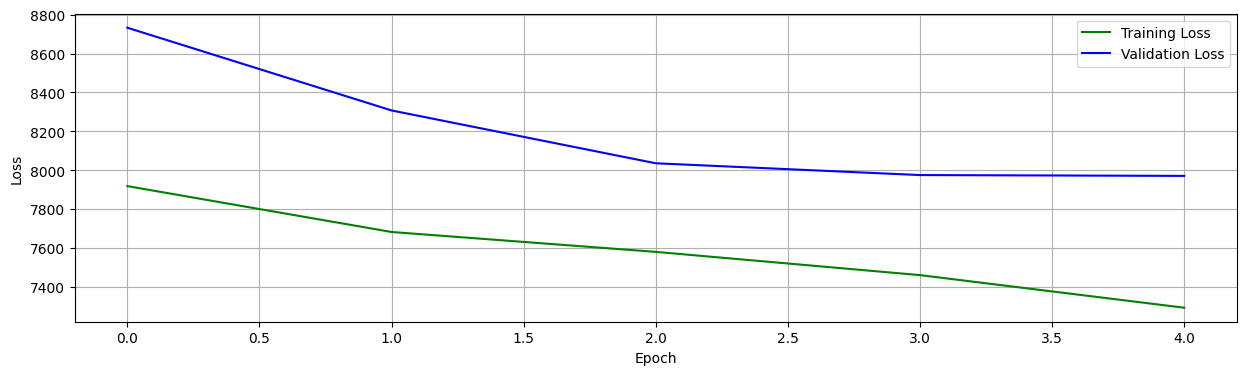

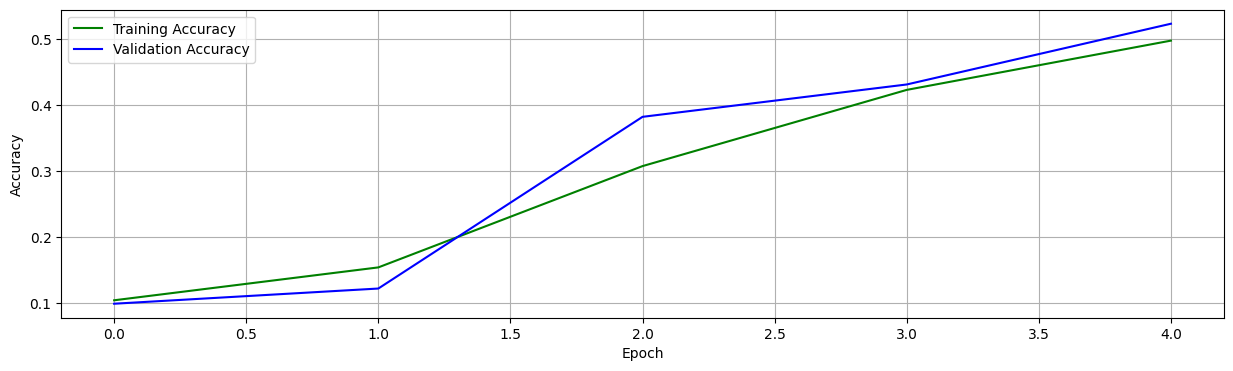

In [19]:
plot_results([ np.abs(train_lbs), np.abs(test_lbs) ],        
            ylabel="Loss", 
            metric_name=["Training Loss", "Validation Loss"],
            color=["g", "b"]);

plot_results([ train_accs, test_accs ], 
            ylabel="Accuracy",
            metric_name=["Training Accuracy", "Validation Accuracy"],
            color=["g", "b"])